In [1]:
import matplotlib.pyplot as plt
import os
import json
import numpy as np

In [2]:
# Select the dataset you need
dataset_name = 'NucleiSeg'
# Replace by source dir location
source_dir = f'/home/rob/Documents/3_projects/bench/analysis/{dataset_name}'

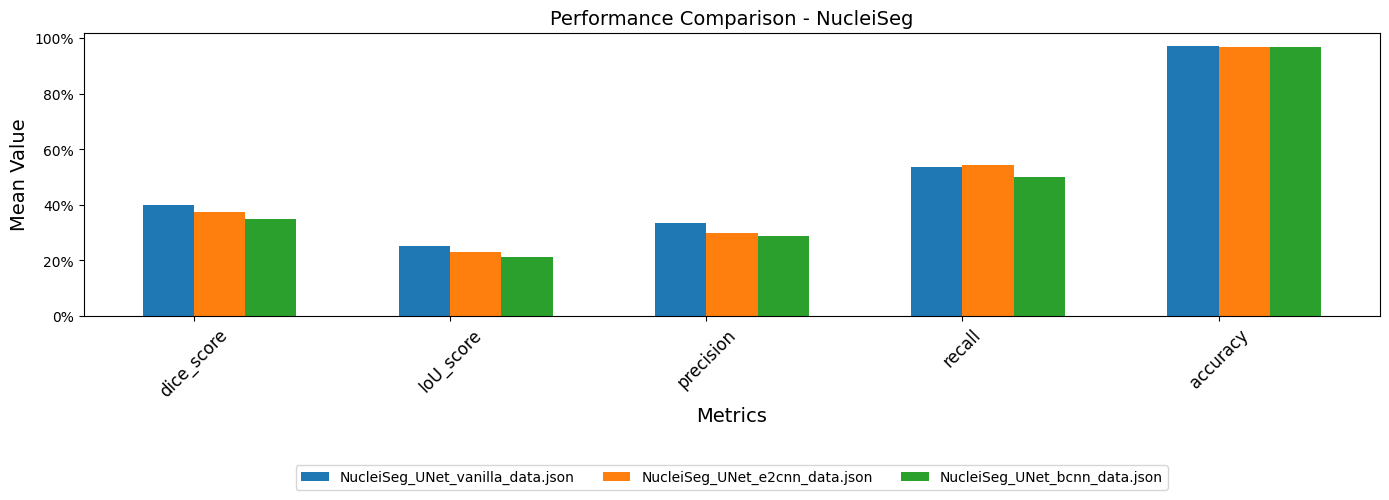

In [3]:
json_files = [f for f in os.listdir(source_dir) if f.endswith('.json')]

# Dictionary to store the data
data = {}

# Load each JSON file and store the data
for json_file in json_files:
    with open(os.path.join(source_dir, json_file), 'r') as f:
        data[json_file] = json.load(f)

# Extract the mean values for each metric from each model
metrics = ["dice_score", "IoU_score", "precision", "recall", "accuracy"]
model_names = list(data.keys())
mean_values = {metric: [] for metric in metrics}

for metric in metrics:
    for model in model_names:
        mean_values[metric].append(data[model][metric]['mean'] * 100)  # Convert to percentage

# Plotting the data using matplotlib
x = np.arange(len(metrics))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 6))
for i, model in enumerate(model_names):
    ax.bar(x + i*width, [mean_values[metric][i] for metric in metrics], width, label=model)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics', fontsize=14)
ax.set_ylabel('Mean Value', fontsize=14)
ax.set_title(f'Performance Comparison - {dataset_name}', fontsize=14)
ax.set_xticks(x + width / 2)
ax.set_xticklabels(metrics, fontsize=12)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), ncol=len(model_names), fontsize=10)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))

# Rotate the tick labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()

# Save as pdf
output_path = os.path.join(source_dir, f'{dataset_name}_performance_comparison.pdf')
plt.savefig(output_path, format='pdf')

plt.show()